# Probability Distribution Sampling
Given a uniform random generator for $[0,1]$ and a probability distribution $P(y)$, how can one generate samples ${y_i}$ according to $P(y)$? I will use this notebook to do numerical studies from the analytic solution of this problem.

Assume $y_i = y_i(x_i)$. Then we must have by the definition of probability distributions,

$$ P(y)dy = P(x) dx$.

Now for a uniform distribution P(x) on $[0,1]$, we have a differential equation for P(y),

\begin{align*}
P(y) &= \frac{dx}{dy} \\
x &= \int P(y) dy = F(y)
\end{align*}

This can be inverted, $y = F^{-1}(x)$. Now, we can generate $y_i$ using $x_i$ and $F^{-1}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

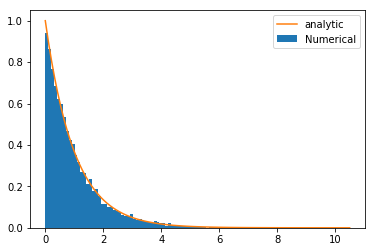

In [12]:
# example : exponential distribution
num_points = 10000
x = np.random.rand(num_points)
y = - np.log(1 - x)
plt.hist(y,bins="auto",density=True,label="Numerical")

y_analytic = np.linspace(0,np.max(y),100)
Py = np.exp(-y_analytic)
plt.plot(y_analytic,Py,label="analytic")
plt.legend()

## Metropolis Algorithm
We want to generate samples according to a given $P(x)$. The Metropolis algorithm is a random walk method, that provides a walk of point ${x_i}$, whose asymptotic probability approaches $P(x)$.

The walk is defined by a transition probability $w(i \rightarrow j ) = w_{ij}$. If $w_{ij}$ satisfies the detailed balance condition, 
$$ w_{ij} p(x_i) = w_{ji} p(x_j) $$
then the distribution of points converges to the $P(x)$.

This condition does not specify the choice for $w_{ij}$. A simple choice is,

$$ w_{ij} = \min\left(1,\frac{P(x_j)}{P(x_i)}\right) $$

In [24]:
def next_x(x,delta,P):
    '''
        x is the current sample
        delta is the random step to take from x
        P is the prob. distribution function
    '''
   
    x_t = x + delta
    
    # transition prob
    w = P(x_t)/P(x)
    
    if w >= 1:
        return x_t
    else:
        r = np.random.rand()
        if r < w:
            return x_t
        else:
            return x

def gauss(x):
    '''
        Gaussian
    '''
    return (1.0/np.sqrt(np.pi))*np.exp(-x**2)

In [41]:
# example : generating a Gaussian

x_0 = 0
delta_max = 3.0
n_iter = 10000
x_list = np.zeros(n_iter)

x_list[0] = x_0
for i in range(n_iter-1):
    delta = delta_max*(-1 + 2*np.random.rand())
    x_list[i+1] = next_x(x_list[i],delta,gauss)

x_list = np.array(x_list)

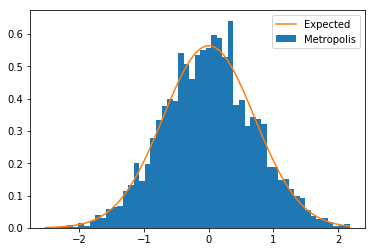

In [42]:
plt.hist(x_list,bins="auto",density=True,label="Metropolis")
x_analytic = np.linspace(np.min(x_list),np.max(x_list),100)
plt.plot(x_analytic,gauss(x_analytic),label="Expected")
plt.legend()